In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 4.9MB/s 


In [3]:
import pandas as pd
import numpy as np
import pydicom
import glob

In [4]:
IMG_DIR = "/content/drive/MyDrive/AI Girls/ai_wonder_girls_medical_imaging/Resources/university-hospital-basel/training_set"

In [5]:
mydicoms = glob.glob(IMG_DIR + "/*/*/*.dcm")

In [26]:
# Transform DICOM to PNG
import cv2 as cv
import os
import pydicom

#inputdir = mydicoms
outdir = '/content/drive/MyDrive/AI Girls/ai_wonder_girls_medical_imaging/Resources/dicomToPNG/'
#os.mkdir(outdir)

test_list = mydicoms

for f in mydicoms:   # remove "[:10]" to convert all images 
    #print(f)
    ds = pydicom.read_file(f) # read dicom image
    #print(ds)
    img = ds.pixel_array # get image array
    #print(img.shape)
    #img = cv.resize(img, (224, 224))
    #norm_img = np.zeros((1024, 224))
    #final_img = cv.normalize(img,  img, 0, 255, cv.NORM_MINMAX)
    dirName = f.split("/")[-3:][0] + "/" + f.split("/")[-3:][1] + "/"
    try:
      os.makedirs(outdir + dirName)
    except:
      pass
    #print(outdir + dirName + f.split("/")[-1].replace('.dcm','.png'))
    #print(outdir + f.split("/")[-1])
    cv.imwrite(outdir + dirName + f.split("/")[-1].replace('.dcm','.png'), img) # write png image   

In [27]:
dcm_png_dir = "/content/drive/MyDrive/AI Girls/ai_wonder_girls_medical_imaging/Resources/dicomToPNG"
train_png_f = glob.glob(dcm_png_dir + "/*/*/*.png")

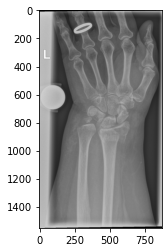

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
im = cv.imread(train_png_f[1])
plt.imshow(im, cmap='gray')

In [30]:
train_png_f[1]

'/content/drive/MyDrive/AI Girls/ai_wonder_girls_medical_imaging/Resources/dicomToPNG/wrist_fracture_yes/Anonymous^01529^^^_1_Handgelenkbeidseits_1_XHandgelenklinksap/00000001.png'

(224, 224, 3)


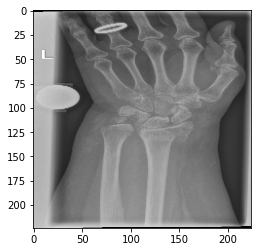

In [18]:
im = cv.imread(train_png_f[1])
im = cv.resize(im, (224, 224))
norm_img = np.zeros((224, 224))
final_img = cv.normalize(im,  im, 0, 255, cv.NORM_MINMAX)
print(final_img.shape)
plt.imshow(im, cmap='gray')

In [42]:
for f in train_png_f:
    im = cv.imread(f)
    im = cv.resize(im, (224, 224))
    final_img = cv.normalize(im,  im, 0, 255, cv.NORM_MINMAX)
    #print(final_img.shape)
    cv.imwrite(f, final_img[:, :, 1]) # save image in gray format 
    #plt.imshow(final_img, cmap='gray')  

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 

In [34]:
import PIL
from PIL import Image
for f in train_png_f:
    im = Image.open(f)
    if sum(im.convert("L").getextrema()) in (0, 2):
      print(f)

In [35]:
len(train_png_f)

170

In [36]:
train_png_f[0].split("/")[-2]

'Anonymous^01504^^^_1_Handgelenkrechts_3_XHandgelenkrechtslat'

In [37]:
train_png_f[0].split("/")[8].split("_")[-1]

'yes'

In [ ]:
# class_f=train_png_f[0].split("/")[8].split("_")[-1], path=train_png_f[i], nameofthefile=train_png_f[i].split("/")[-2]

In [38]:
class_f, path, nameofthefile = [], [], []
for f in train_png_f:
  class_f.append(f.split("/")[8].split("_")[-1])
  path.append(f)
  nameofthefile.append(f.split("/")[-2])

In [39]:
train_df = pd.DataFrame({"FileName": nameofthefile,
                         "Class": class_f,
                         "Path": path})

In [40]:
train_df.head()

,FileName,Class,Path
0,Anonymous^01504^^^_1_Handgelenkrechts_3_XHandg...,yes,/content/drive/MyDrive/AI Girls/ai_wonder_girl...
1,Anonymous^01529^^^_1_Handgelenkbeidseits_1_XHa...,yes,/content/drive/MyDrive/AI Girls/ai_wonder_girl...
2,Anonymous^01527^^^_1_Handgelenklinks_2_XHandge...,yes,/content/drive/MyDrive/AI Girls/ai_wonder_girl...
3,Anonymous^01517^^^_1_Handgelenklinks_1_XHandge...,yes,/content/drive/MyDrive/AI Girls/ai_wonder_girl...
4,Anonymous^01515^^^_1_Handgelenklinks_2_XHandge...,yes,/content/drive/MyDrive/AI Girls/ai_wonder_girl...


In [62]:
pwd

'/content'

In [41]:
train_df.to_csv("/content/drive/MyDrive/AI Girls/ai_wonder_girls_medical_imaging/Resources/dicomToPNG/training_files.csv")

Check [this link](https://pydicom.github.io/pydicom/stable/old/viewing_images.html) to know a bit more about the pydicom library.

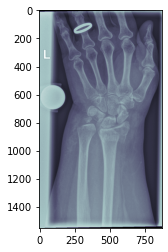

In [41]:
import matplotlib.pyplot as plt
import pydicom

ds = pydicom.dcmread(mydicoms[1])
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

In [17]:
mydata.iloc[1]

PatientID     e0ac71efecc68f3238d0a160fd
PatientAge                            58
PatientSex                             F
Modality                              CR
Findings            Handgelenk beidseits
Rows                                1551
Columns                              872
Name: 1, dtype: object

In [ ]:
mydata.to_csv("Challenge5_dicom_info.csv")